In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
!pip install pip==23.2.1
!pip install textract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Obtaining dependency information for textract from https://files.pythonhosted.org/packages/6b/3e/ac16b6bf28edf78296aea7d0cb416b49ed30282ac8c711662541015ee6f3/textract-1.6.5-py3-none-any.whl.metadata
  Obtaining dependency information for argcomplete~=1.10.0 from https://files.pythonhosted.org/packages/ae/8e/6b293f883fdbd29b9c8170db44bddff9e7de224d8cf1eb4287f69f1766e5/argcomplete-1.10.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for beautifulsoup4~=4.8.0 from https://files.pythonhosted.org/packages/cb/a1/c698cf319e9cfed6b17376281bd0efc6bfc8465698f54170ef60a485ab5d/beautifulsoup4-4.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for chardet==3.* from https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55e

# Training Code


In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## 1. Extract the Text from Dataset

In [2]:
file_path1 = []
category1  = []
directory1 = '/content/drive/MyDrive/Final_ML_Project/Dataset/Resumes/PeopleSoft/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
2,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
5,Classification: Internal\n\nClassification: In...,PeopleSoft
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
7,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
9,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft


In [3]:
file_path2 = []
category2  = []
directory2 = '/content/drive/MyDrive/Final_ML_Project/Dataset/Resumes/React JS Developer/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer
1,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer
2,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
5,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer
7,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer
8,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
9,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer


In [4]:
file_path3 = []
category3  = []
directory3 = '/content/drive/MyDrive/Final_ML_Project/Dataset/Resumes/SQL Developer/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
1,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
2,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
3,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
4,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
5,KAMBALLA PRADEEP ...,SQL Developer
6,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
7,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer
8,BUDDHA VAMSI ...,SQL Developer
9,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer


In [5]:
file_path4 = []
category4  = []
directory4 = '/content/drive/MyDrive/Final_ML_Project/Dataset/Resumes/Workday/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Workday HCM Techno functional Consultant ...,Workday
1,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
2,Vinay kumar .v\nWorkday Functional Consultant\...,Workday
3,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
5,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
6,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
7,G Himaja\n\n ...,Workday
8,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
9,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday


## 2. Create a DataFrame

In [6]:
resume_data = pd.concat([data1, data2, data3, data4], ignore_index=True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
2,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN
5,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
7,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
9,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN


In [7]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


### 2.1 Merge all Unnecessary column in One Column

In [8]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
5,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
7,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
9,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft


In [9]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

### 2.2 Final Dataset

In [10]:
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
2,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
3,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
4,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
5,PeopleSoft,Classification: Internal\n\nClassification: In...
6,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
7,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."


### 2.3 Save new CSV File

In [11]:
resume_data.to_csv('/content/drive/MyDrive/Final_ML_Project/Dataset/Raw_Resume.csv', index=False)

## 3. Data Understanding

In [12]:
resume_data = pd.read_csv("/content/drive/MyDrive/Final_ML_Project/Dataset/Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
2,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
3,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
4,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
5,PeopleSoft,Classification: Internal\n\nClassification: In...
6,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
7,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."


In [13]:
resume_data.isnull().sum()

,0
Category,0
Raw_Details,0


### 3.1 Number of Words in each Resume

In [14]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,PeopleSoft Administration\n\n \n\nVivekanand S...,2585
2,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540


### 3.2 Number of Characters

In [15]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,PeopleSoft Administration\n\n \n\nVivekanand S...,16112
2,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,2150
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,3669
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,3577


### 3.3 Number of Stopwords

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,PeopleSoft Administration\n\n \n\nVivekanand S...,520
2,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,42
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,84
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,136


### 3.4 Number of Numerics

In [18]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,PeopleSoft Administration\n\n \n\nVivekanand S...,17
2,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,8
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,13
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,3


In [19]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
2,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
3,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
4,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3
5,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
6,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
7,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
9,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15


## 4. Text Pre-Processing

### 4.1 Using Regular Expression

In [20]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [ ]:
import re
resume_data = pd.read_csv('/content/drive/MyDrive/Final_ML_Project/Dataset/Resumes/Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

### 4.2 Clean Text from Resume

In [21]:
resume_data


,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
2,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
3,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
4,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3
5,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
6,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
7,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
9,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15


### 4.3 Save the Clean Data in new CSV File

In [22]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,1023,8010,190,4
1,PeopleSoft,2585,16112,520,17
2,PeopleSoft,356,2150,42,8
3,PeopleSoft,433,3669,84,13
4,PeopleSoft,540,3577,136,3
5,PeopleSoft,558,4917,114,7
6,PeopleSoft,918,7943,225,4
7,PeopleSoft,448,3714,88,13
8,PeopleSoft,363,2852,98,4
9,PeopleSoft,455,3800,86,15


In [23]:
resume_data.to_csv('/content/drive/MyDrive/Final_ML_Project/Dataset/Cleaned_Resumes.csv', index = False)

In [24]:
import re
import string

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt_tab')
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')  # Ensure punkt is downloaded
nltk.download('wordnet')

def preprocess_text(text):
    # Handle potential float values
    if isinstance(text, float):
        text = str(text)  # Convert float to string if necessary

    # Convert text to lowercase
    text = text.lower()

    # Remove specific unwanted characters
    text = text.replace('â€¢', '')
    text = text.replace('â–', '')  # Remove additional unwanted characters

    # Remove URLs
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove emoticons and other symbols
    regex_pattern = re.compile("["u"\U0001F600-\U0001F64F"u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF"u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
    text = regex_pattern.sub(r'', text)

    # Remove digits
    text = ''.join([i for i in text if not i.isdigit()])

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]

    # Join words back into a single string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# Load the dataset
updated_resumes_path = '/content/drive/MyDrive/Final_ML_Project/Dataset/UpdatedResumeDataSet.csv'
updated_resumes_df = pd.read_csv(updated_resumes_path)

# Apply preprocessing
updated_resumes_df['Resume_Details'] = updated_resumes_df['Resume_Details'].apply(preprocess_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [25]:
updated_resumes_df

,Category,Resume_Details
0,Data Science,skills program languages python pandas numpy s...
1,Data Science,education detail may may uitrgpv data scientis...
2,Data Science,areas interest deep learn control system desig...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,education detail mca ymcaust faridabad haryana...
...,...,...
957,Testing,computer skills â¢ proficient ms office word ...
958,Testing,â willingness accept challenge â positive ...
959,Testing,personal skills â¢ quick learner â¢ eagernes...
960,Testing,computer skills software knowledge mspower poi...


In [26]:
updated_resumes_df.to_csv('/content/drive/MyDrive/Final_ML_Project/Dataset/Cleaned_Resumes1.csv', index = False)

In [27]:
import pandas as pd

# Load the uploaded files
updated_resumes_path = '/content/drive/MyDrive/Final_ML_Project/Dataset/Cleaned_Resumes1.csv'
cleaned_resumes_path = '/content/drive/MyDrive/Final_ML_Project/Dataset/Resumes/Cleaned_Resumes.csv'

# Read the CSV files into DataFrames
updated_resumes_df = pd.read_csv(updated_resumes_path)
cleaned_resumes_df = pd.read_csv(cleaned_resumes_path)

# Display the column names to identify the common column for merging
updated_resumes_df.columns, cleaned_resumes_df.columns


(Index(['Category', 'Resume_Details'], dtype='object'),
 Index(['Category', 'Resume_Details'], dtype='object'))

In [28]:
# Concatenate the two datasets
concatenated_df = pd.concat([updated_resumes_df, cleaned_resumes_df], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
output_concat_path = '/content/drive/MyDrive/Final_ML_Project/Dataset/Concatenated_Resumes.csv'
concatenated_df.to_csv(output_concat_path, index=False)

output_concat_path


'/content/drive/MyDrive/Final_ML_Project/Dataset/Concatenated_Resumes.csv'

### 5 Number of Total Resumes

In [29]:
import pandas as pd
resume_data = pd.read_csv('/content/drive/MyDrive/Final_ML_Project/Dataset/Concatenated_Resumes.csv')
resume_data.Category.value_counts().index
resume_data.Category.value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Data Science,40
Blockchain,40


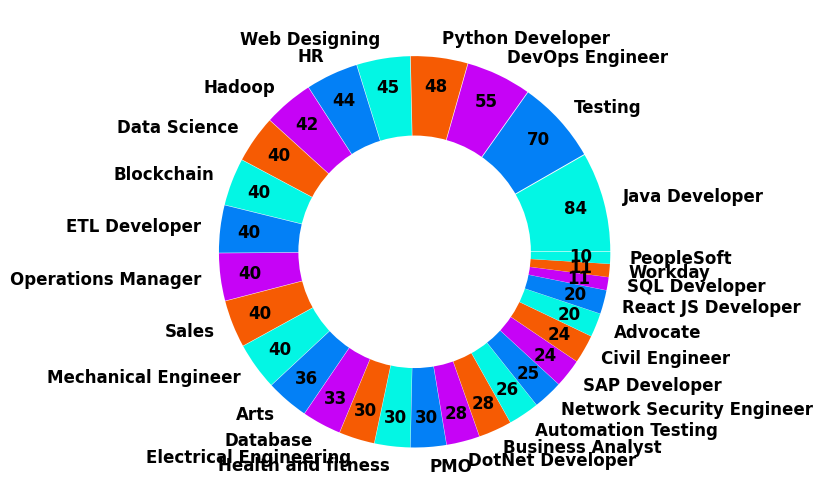

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))

sizes = resume_data.Category.value_counts()
labels = resume_data.Category.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03']

# Dynamically create explode with the same length as sizes
explode = [0.01] * len(sizes)

plt.pie(
    sizes,
    colors=colors,
    labels=labels,
    autopct=lambda x: '{:.0f}'.format(x * sizes.sum() / 100),
    pctdistance=0.85,
    explode=explode,
    startangle=0,
    textprops={'size': 'large', 'fontweight': 'bold'}
)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

# plt.title('Number of Profiles in Resumes', fontsize=18, fontweight='bold')
# plt.legend(labels, loc="center")

# Ensure rcParams is properly imported before use
import pylab
pylab.rcParams.update(pylab.rcParams)

fig.tight_layout()
plt.show()

# Save the figure
fig.savefig('/content/drive/MyDrive/Final_ML_Project/Images/No_Resume_Pie.png', dpi=500)


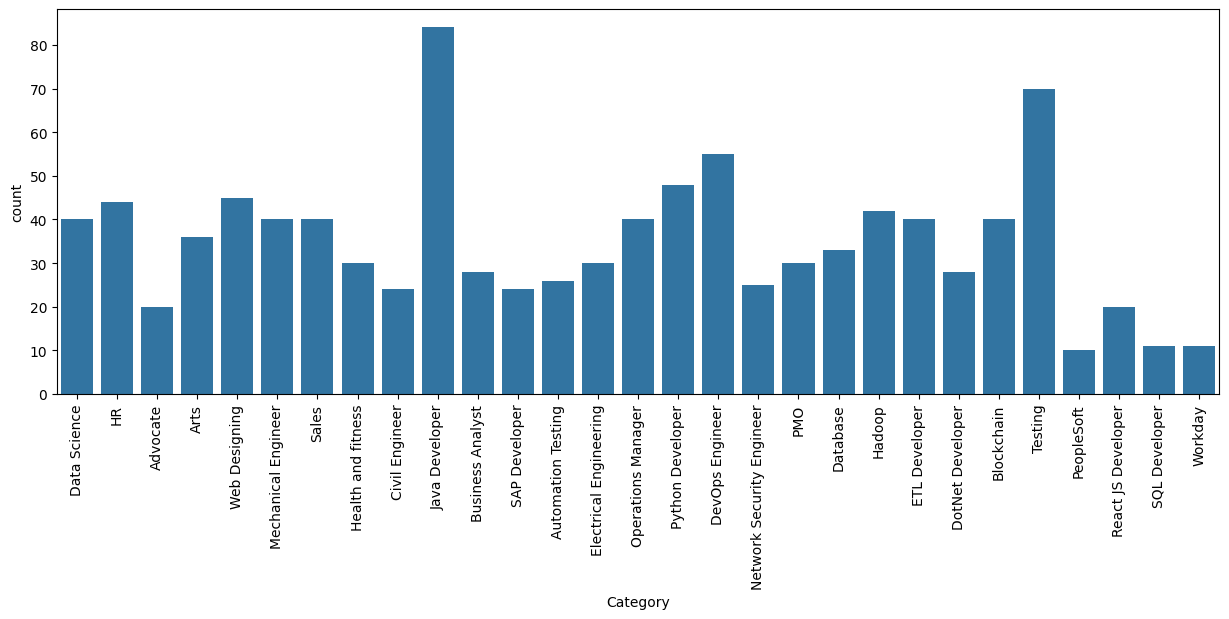

In [31]:
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.countplot(x='Category', data=resume_data)  # Set 'Category' as x-axis
plt.xticks(rotation=90)  # Uncomment this line to rotate the x-axis labels if needed
plt.show()

## 6. Data Preprocessing
### 6.1 LabelEncoder

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [4]:
resume_data = pd.read_csv('/content/drive/MyDrive/Final_ML_Project/Dataset/Concatenated_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,Data Science,skills program languages python pandas numpy s...
1,Data Science,education detail may may uitrgpv data scientis...
2,Data Science,areas interest deep learn control system desig...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,education detail mca ymcaust faridabad haryana...


In [5]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,Data Science,skills program languages python pandas numpy s...,6
1,Data Science,education detail may may uitrgpv data scientis...,6
2,Data Science,areas interest deep learn control system desig...,6
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,6
4,Data Science,education detail mca ymcaust faridabad haryana...,6
...,...,...,...
1009,Workday,venkata saikrishna workday consultant profssio...,28
1010,Workday,workday hcm techno functional consultant rahul...,28
1011,Workday,jyoti verma professional summary professional ...,28
1012,Workday,workday hcm fcm name kumar role workday consul...,28


In [6]:
resume_data.describe()

,LebelEncoding
count,1014.000000
mean,14.052268
std,8.003592
min,0.000000
25%,8.000000
50%,14.000000
75%,21.000000
max,28.000000


## 7. Model Building

### 7.1 Train - Test Split

In [7]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.30,stratify=y)
x_train.shape, x_test.shape

((709,), (305,))

### 7.2 TF-IDF Vectorization

In [9]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [10]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)


In [11]:
print(x_train)

  (0, 2144)	0.009511868662146422
  (0, 530)	0.022185356934357497
  (0, 2180)	0.019469515313295663
  (0, 5440)	0.02975645301683274
  (0, 4018)	0.009803920654945923
  (0, 7277)	0.010461552982491138
  (0, 4733)	0.04675937514923304
  (0, 4063)	0.05032895414955507
  (0, 1798)	0.056505188836326554
  (0, 1437)	0.062393837126134305
  (0, 2081)	0.06179334774859446
  (0, 2759)	0.060364633800128666
  (0, 6342)	0.00707699932414016
  (0, 1271)	0.021579236116010394
  (0, 1834)	0.01828567812713463
  (0, 3021)	0.026432311821043403
  (0, 821)	0.022666023518608816
  (0, 4397)	0.016340051273412662
  (0, 1799)	0.03565232514527491
  (0, 3417)	0.03565232514527491
  (0, 5459)	0.014010439414544922
  (0, 526)	0.02435435012062714
  (0, 7008)	0.01910650578004022
  (0, 1695)	0.017630245100622312
  (0, 1838)	0.02561511063405466
  :	:
  (708, 3427)	0.09319598693792215
  (708, 2188)	0.0968151790238134
  (708, 2267)	0.10134775508236447
  (708, 2486)	0.21268964424477602
  (708, 6998)	0.17159666577378532
  (708, 2453)	

In [12]:
print(y_train),print(y_test)

['Operations Manager' 'Sales' 'DotNet Developer' 'Sales' 'SAP Developer'
 'DevOps Engineer' 'Testing' 'Sales' 'Data Science' 'Python Developer'
 'Advocate' 'Operations Manager' 'Hadoop' 'Electrical Engineering'
 'Testing' 'Hadoop' 'Hadoop' 'Civil Engineer' 'Data Science' 'Testing'
 'Java Developer' 'Testing' 'Java Developer' 'Data Science'
 'DevOps Engineer' 'HR' 'Advocate' 'Mechanical Engineer' 'ETL Developer'
 'DevOps Engineer' 'Electrical Engineering' 'Operations Manager'
 'Database' 'Database' 'Python Developer' 'Hadoop' 'Testing'
 'Java Developer' 'React JS Developer' 'SQL Developer' 'Testing'
 'Advocate' 'Hadoop' 'React JS Developer' 'Testing' 'Sales'
 'Operations Manager' 'React JS Developer' 'Automation Testing' 'Testing'
 'Business Analyst' 'DotNet Developer' 'HR' 'Python Developer' 'PMO'
 'Network Security Engineer' 'Java Developer' 'Blockchain' 'HR'
 'Business Analyst' 'Java Developer' 'PeopleSoft' 'Web Designing'
 'Web Designing' 'ETL Developer' 'Business Analyst'
 'Network

(None, None)

# 8. Classification Models

## 8.1 KNN Classifier

In [14]:
import joblib

In [15]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

joblib.dump(model_knn, "/content/drive/MyDrive/Final_ML_Project/knn_model.pkl")

print("Model has been saved as 'knn_model.pkl'.")

Accuracy of training set : 0.78
Accuracy of  test set    : 0.77
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                           precision    recall  f1-score   support

                 Advocate       1.00      0.67      0.80         6
                     Arts       1.00      0.73      0.84        11
       Automation Testing       1.00      0.75      0.86         8
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       1.00      0.12      0.22         8
           Civil Engineer       1.00      0.71      0.83         7
             Data Science       1.00      0.67      0.80        12
                 Database       0.82      0.90      0.86        10
          DevOps Engineer       0.59      1.00      0.74        17
         DotNet Developer       0.78      0.88      0.82         8
            ETL Developer       0.78      0.58      0.67        12
   Electrical Engineering       0.89      0.89      0.89

## 8.2 Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Regularized Decision Tree
model_DT = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=2,random_state=42)
model_DT.fit(x_train, y_train)

# Predictions
y_pred = model_DT.predict(x_test)

# Metrics
accuracy_DT_train = model_DT.score(x_train, y_train)
accuracy_DT_test = model_DT.score(x_test, y_test)

print(f"Accuracy of training set: {accuracy_DT_train:.2f}")
print(f"Accuracy of test set: {accuracy_DT_test:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

joblib.dump(model_DT, "/content/drive/MyDrive/Final_ML_Project/DT_model.pkl")

print("Model has been saved as 'DT_model.pkl'.")


Accuracy of training set: 0.74
Accuracy of test set: 0.72
Classification Report:
                            precision    recall  f1-score   support

                 Advocate       0.00      0.00      0.00         6
                     Arts       1.00      1.00      1.00        11
       Automation Testing       0.44      0.50      0.47         8
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       0.00      0.00      0.00         8
           Civil Engineer       1.00      0.14      0.25         7
             Data Science       1.00      0.50      0.67        12
                 Database       1.00      1.00      1.00        10
          DevOps Engineer       1.00      1.00      1.00        17
         DotNet Developer       0.00      0.00      0.00         8
            ETL Developer       0.92      1.00      0.96        12
   Electrical Engineering       0.11      1.00      0.20         9
                       HR       0.72      1.00

## 8.3 Random Forest Classifier

Accuracy of training set: 0.96
Accuracy of test set: 0.92
Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      0.33      0.50         6
                     Arts       1.00      1.00      1.00        11
       Automation Testing       1.00      0.62      0.77         8
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       1.00      1.00      1.00         8
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       0.90      0.75      0.82        12
                 Database       0.77      1.00      0.87        10
          DevOps Engineer       1.00      1.00      1.00        17
         DotNet Developer       1.00      0.75      0.86         8
            ETL Developer       0.92      1.00      0.96        12
   Electrical Engineering       1.00      1.00      1.00         9
                       HR       1.00      1.00

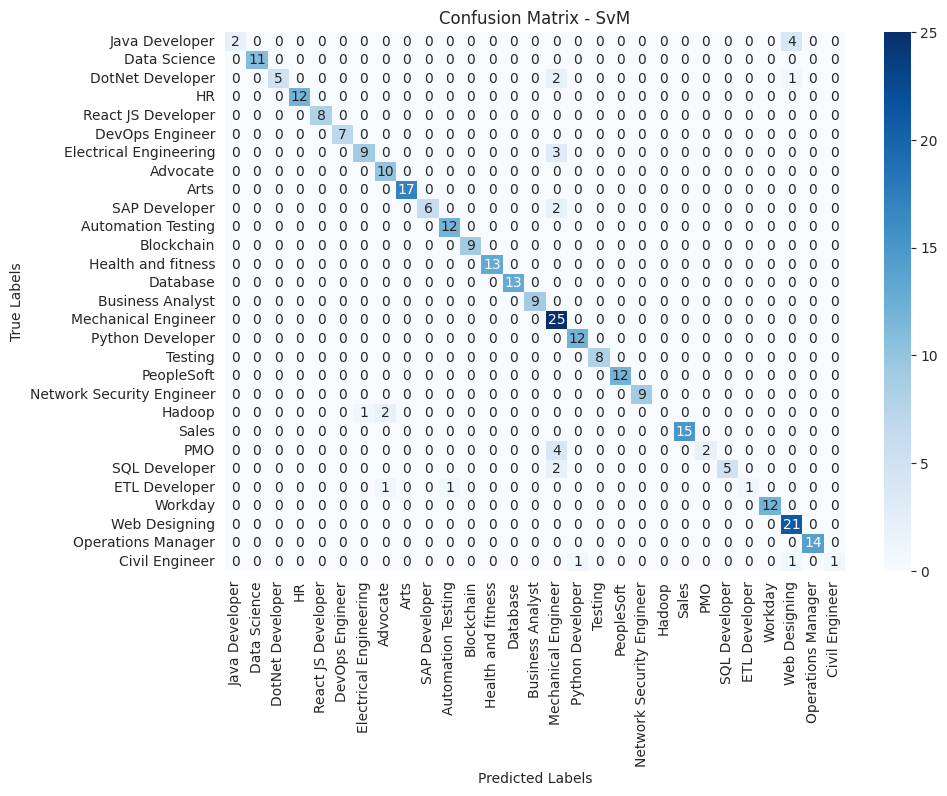

Model has been saved as 'RF_model.pkl'.


In [17]:


# Random Forest with regularization
model_RF = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
model_RF.fit(x_train, y_train)

# Predictions
y_pred = model_RF.predict(x_test)

# Metrics
accuracy_RF_train = model_RF.score(x_train, y_train)
accuracy_RF_test = model_RF.score(x_test, y_test)
precision_RF = round(precision_score(y_test, y_pred, average='macro'), 2)
recall_RF = round(recall_score(y_test, y_pred, average='macro'), 2)
f1_RF = round(f1_score(y_test, y_pred, average='macro'), 2)

print(f"Accuracy of training set: {accuracy_RF_train:.2f}")
print(f"Accuracy of test set: {accuracy_RF_test:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)
cm_lgr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lgr, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix - SvM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

joblib.dump(model_RF, "/content/drive/MyDrive/Final_ML_Project/RF_model.pkl")

print("Model has been saved as 'RF_model.pkl'.")

## 8.4 Support Vectore Machine (SVM) Classifier

Accuracy of training set : 1.00
Accuracy of  test set    : 0.99
Classification report for classifier SVC():
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00        11
       Automation Testing       1.00      0.75      0.86         8
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       1.00      1.00      1.00         8
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       1.00      1.00      1.00        12
                 Database       1.00      1.00      1.00        10
          DevOps Engineer       1.00      1.00      1.00        17
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.00        12
   Electrical Engineering       1.00      1.00      1.00         9
                    

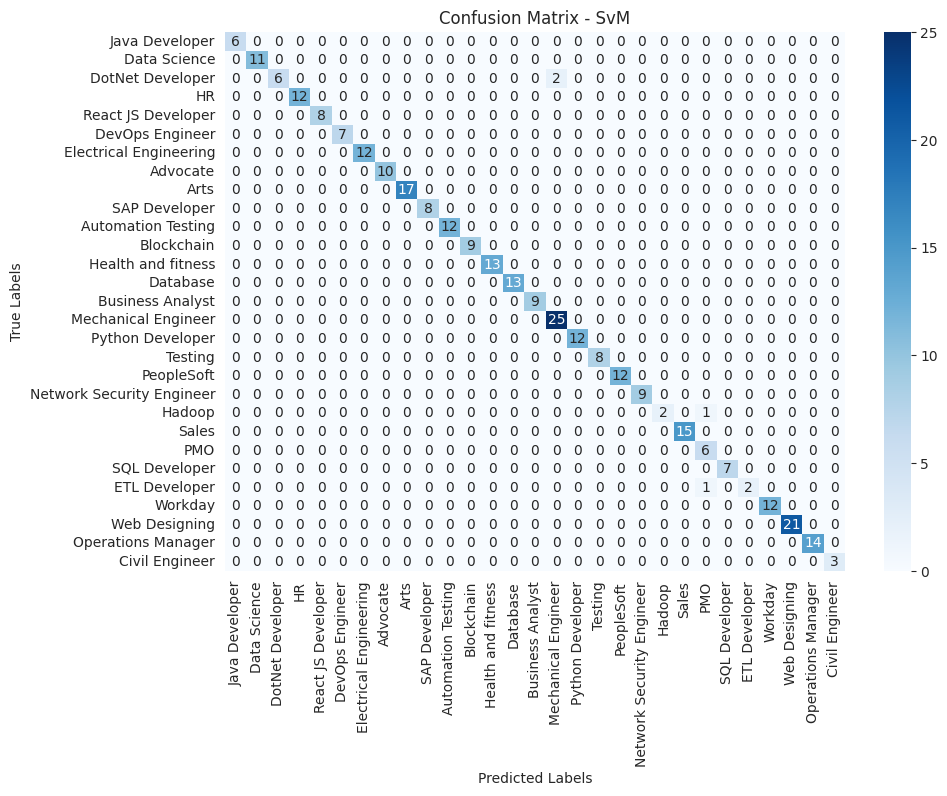

Model has been saved as 'SVM_model.pkl'.


In [18]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)
cm_lgr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lgr, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix - SvM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


joblib.dump(model_svm, "/content/drive/MyDrive/Final_ML_Project/SVM_model.pkl")

print("Model has been saved as 'SVM_model.pkl'.")

## 8.5 Logistic Regression

In [19]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)


joblib.dump(model_lgr, "/content/drive/MyDrive/Final_ML_Project/LGR_model.pkl")

print("Model has been saved as 'LGR_model.pkl'.")

Accuracy of training set : 1.00
Accuracy of  test set    : 0.98
Classification report for classifier LogisticRegression():
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00        11
       Automation Testing       1.00      0.62      0.77         8
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       1.00      1.00      1.00         8
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       1.00      1.00      1.00        12
                 Database       1.00      1.00      1.00        10
          DevOps Engineer       1.00      1.00      1.00        17
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.00        12
   Electrical Engineering       0.90      1.00      0.95         9
     

## 8.6 Bagging Classifier

In [20]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

joblib.dump(model_bagg, "/content/drive/MyDrive/Final_ML_Project/BAG_model.pkl")

print("Model has been saved as 'BAG_model.pkl'.")

Accuracy of training set : 0.97
Accuracy of  test set    : 0.95
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                           precision    recall  f1-score   support

                 Advocate       1.00      0.83      0.91         6
                     Arts       1.00      1.00      1.00        11
       Automation Testing       1.00      0.62      0.77         8
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       1.00      1.00      1.00         8
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       1.00      0.33      0.50        12
                 Database       1.00      0.90      0.95        10
          DevOps Engineer       1.00      1.00      1.00        17
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.0

## 8.7 AdaBoost Classifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use a more complex base estimator
estimator = DecisionTreeClassifier(max_depth=3)
model_Adaboost = AdaBoostClassifier(estimator=estimator, n_estimators=200, learning_rate=0.5)

# Compute sample weights for class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train the model
model_Adaboost.fit(x_train, y_train, sample_weight=sample_weights)

# Make predictions
y_pred = model_Adaboost.predict(x_test)

# Metrics
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of test set     : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report:\n", classification_report(y_test, y_pred))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)
# print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
joblib.dump(model_Adaboost, "/content/drive/MyDrive/Final_ML_Project/Adaboost_model.pkl")

print("Model has been saved as 'Adaboost_model.pkl'.")

Accuracy of training set : 0.96
Accuracy of test set     : 0.94
Classification report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00        11
       Automation Testing       1.00      1.00      1.00         8
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       1.00      1.00      1.00         8
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       1.00      1.00      1.00        12
                 Database       1.00      1.00      1.00        10
          DevOps Engineer       1.00      1.00      1.00        17
         DotNet Developer       0.35      1.00      0.52         8
            ETL Developer       0.92      1.00      0.96        12
   Electrical Engineering       1.00      1.00      1.00         9
                       HR       1.00    

## 8.8 Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Train Gradient Boosting Classifier with Hyperparameter Tuning
model_gb = GradientBoostingClassifier(
    n_estimators=50,   # Increase the number of boosting stages
    max_depth=1,        # Increase tree depth for more complexity
    learning_rate=0.005, # Decrease learning rate for finer adjustments
    subsample=0.8,      # Use a subset of data to prevent overfitting
    random_state=42
)
model_gb.fit(x_train, y_train)

# Step 2: Predictions
y_pred = model_gb.predict(x_test)

# Step 3: Metrics
accuracy_gb_train = model_gb.score(x_train, y_train)
accuracy_gb_test = model_gb.score(x_test, y_test)

print(f"Accuracy of training set: {accuracy_gb_train:.2f}")
print(f"Accuracy of test set: {accuracy_gb_test:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

joblib.dump(model_gb, "/content/drive/MyDrive/Final_ML_Project/GB_model.pkl")

print("Model has been saved as 'GB_model.pkl'.")


Accuracy of training set: 0.93
Accuracy of test set: 0.88
Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00        11
       Automation Testing       1.00      0.50      0.67         8
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       1.00      0.12      0.22         8
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       0.83      0.42      0.56        12
                 Database       0.90      0.90      0.90        10
          DevOps Engineer       1.00      1.00      1.00        17
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       0.92      1.00      0.96        12
   Electrical Engineering       1.00      1.00      1.00         9
                       HR       1.00      0.85

## 8.9 Naive Bayes Classifier

In [23]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

joblib.dump(model_NB, "/content/drive/MyDrive/Final_ML_Project/NB_model.pkl")

print("Model has been saved as 'NB_model.pkl'.")

Accuracy of training set : 1.00
Accuracy of  test set    : 0.97
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         6
                     Arts       1.00      1.00      1.00        11
       Automation Testing       1.00      0.62      0.77         8
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       1.00      1.00      1.00         8
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       1.00      1.00      1.00        12
                 Database       1.00      1.00      1.00        10
          DevOps Engineer       0.94      1.00      0.97        17
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       0.92      1.00      0.96        12
   Electrical Engineering       0.90      1.00      0

8.10.XGBoost

In [24]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import joblib

# Encode labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)        # Encode testing labels

# XGBoost Classifier
model_XGBoost = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_XGBoost.fit(x_train, y_train_encoded)

# Predictions
y_pred = model_XGBoost.predict(x_test)

# Decode predictions back to original labels for readability
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluation Metrics
accuracy_XGBoost = accuracy_score(y_test_encoded, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_XGBoost.score(x_train, y_train_encoded)))
print('Accuracy of test set    : {:.2f}'.format(model_XGBoost.score(x_test, y_test_encoded)))
print("Classification report for classifier %s:\n%s\n" % (model_XGBoost, classification_report(y_test, y_pred_decoded)))

# Confusion Matrix and Other Metrics
nb_cm = confusion_matrix(y_test_encoded, y_pred)
precision_XGBoost = round(precision_score(y_test_encoded, y_pred, average='macro'), 2)
recall_XGBoost = round(recall_score(y_test_encoded, y_pred, average='macro'), 2)
f1_XGBoost = round(f1_score(y_test_encoded, y_pred, average='macro'), 2)
accuracy_XGBoost = round(accuracy_score(y_test_encoded, y_pred), 2)


joblib.dump(model_XGBoost, "/content/drive/MyDrive/Final_ML_Project/XGBOOST_model.pkl")

print("Model has been saved as 'XGBOOST_model.pkl'.")

Accuracy of training set : 1.00
Accuracy of test set    : 0.99
Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...):
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00  

## 9. Model Evaluation

In [25]:
# Compute test accuracies if not already defined
accuracy_knn = model_knn.score(x_test, y_test)
accuracy_DT = model_DT.score(x_test, y_test)
accuracy_RF = model_RF.score(x_test, y_test)
accuracy_svm = model_svm.score(x_test, y_test)
accuracy_lgr = model_lgr.score(x_test, y_test)
accuracy_bagg = model_bagg.score(x_test, y_test)
accuracy_Adaboost = model_Adaboost.score(x_test, y_test)
accuracy_GradientBoost = model_gb.score(x_test, y_test)  # Define this
accuracy_NB = model_NB.score(x_test, y_test)
accuracy_XGBoost = model_XGBoost.score(x_test, y_test_encoded)  # Use encoded test labels if needed

# Updated Evaluation dictionary
Evaluation = {
    "Models": [
        "KNN Classifier",
        "DecisionTree Classifier",
        "RandomForest Classifier",
        "SVM Classifier",
        "Logistic Regression",
        "Bagging Classifier",
        "AdaBoost Classifier",
        "Gradient Boosting Classifier",
        "Naive Bayes Classifier",
        "XGBoost"
    ],
    "Train_Accuracy(%)": [
        model_knn.score(x_train, y_train),
        model_DT.score(x_train, y_train),
        model_RF.score(x_train, y_train),
        model_svm.score(x_train, y_train),
        model_lgr.score(x_train, y_train),
        model_bagg.score(x_train, y_train),
        model_Adaboost.score(x_train, y_train),
        model_gb.score(x_train, y_train),
        model_NB.score(x_train, y_train),
        model_XGBoost.score(x_train, y_train_encoded)
    ],
    "Test_Accuracy(%)": [
        accuracy_knn,
        accuracy_DT,
        accuracy_RF,
        accuracy_svm,
        accuracy_lgr,
        accuracy_bagg,
        accuracy_Adaboost,
        accuracy_GradientBoost,
        accuracy_NB,
        accuracy_XGBoost
    ],
    "Precision(%)": [
        precision_knn,
        precision_DT,
        precision_RF,
        precision_svm,
        precision_lgr,
        precision_bagg,
        precision_Adaboost,
        precision_Gradientboost,
        precision_NB,
        precision_XGBoost
    ],
    "Recall(%)": [
        recall_knn,
        recall_DT,
        recall_RF,
        recall_svm,
        recall_lgr,
        recall_bagg,
        recall_Adaboost,
        recall_Gradientboost,
        recall_NB,
        recall_XGBoost
    ],
    "F1-Score(%)": [
        f1_knn,
        f1_DT,
        f1_RF,
        f1_svm,
        f1_lgr,
        f1_bagg,
        f1_Adaboost,
        f1_Gradientboost,
        f1_NB,
        f1_XGBoost
    ]
}

# Create the table as a DataFrame
import pandas as pd
table = pd.DataFrame(Evaluation)

# Display the DataFrame
table


,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.782793,0.770492,0.76,0.70,0.70
1,DecisionTree Classifier,0.744711,0.724590,0.59,0.58,0.56
2,RandomForest Classifier,0.963329,0.918033,0.93,0.83,0.85
3,SVM Classifier,1.000000,0.986885,0.99,0.97,0.98
4,Logistic Regression,0.997179,0.980328,0.98,0.96,0.97
5,Bagging Classifier,0.974612,0.947541,0.98,0.93,0.94
6,AdaBoost Classifier,0.956276,0.937705,0.94,0.92,0.92
7,Gradient Boosting Classifier,0.932299,0.881967,0.96,0.86,0.88
8,Naive Bayes Classifier,0.998590,0.973770,0.98,0.94,0.95
9,XGBoost,1.000000,0.990164,0.99,0.97,0.97


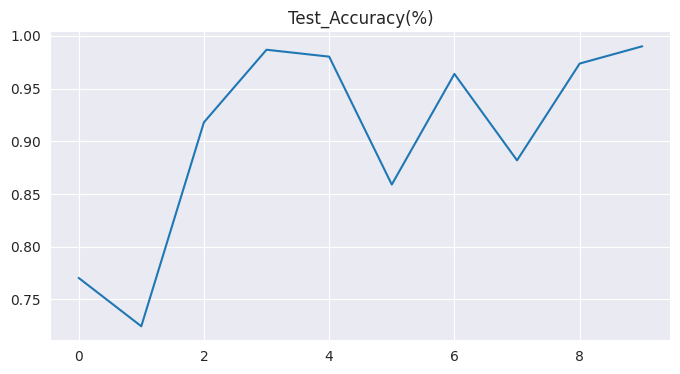

In [64]:
# @title Test_Accuracy(%)

from matplotlib import pyplot as plt
table['Test_Accuracy(%)'].plot(kind='line', figsize=(8, 4), title='Test_Accuracy(%)')
plt.gca().spines[['top', 'right']].set_visible(False)

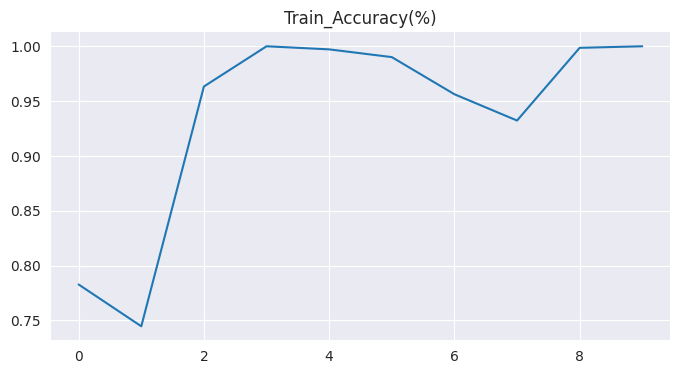

In [ ]:
# @title Train_Accuracy(%)

from matplotlib import pyplot as plt
table['Train_Accuracy(%)'].plot(kind='line', figsize=(8, 4), title='Train_Accuracy(%)')
plt.gca().spines[['top', 'right']].set_visible(False)